In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import heatmap
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from IPython.display import Image,display

ModuleNotFoundError: No module named 'pandas'

In [9]:
import numpy as np

ModuleNotFoundError: No module named 'numpy'

In [8]:
cols = ['pelvic_incidence','pelvic_tilt','lumbar_lordosis_angle','sacral_slope','pelvic_radius',\
        'degree_spondylolisthesis','pelvic_slope','direct_tilt','thoracic_slope','cervical_tilt',\
        'sacrum_angle','scoliosis_slope','normality']

data = pd.read_csv('Dataset_spine.csv',header=0,names=cols,usecols=range(0,13))
data.head()

NameError: name 'pd' is not defined

In [4]:
# Initial data statistics

print("Number of examples: ",data.shape[0])
print("Number of features: ",data.shape[1]-1)
data.describe()

Number of examples:  310
Number of features:  12


,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694,0.472979,21.321526,13.064511,11.933317,-14.053139,25.645981
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027,0.285787,8.639423,3.399713,2.893265,12.225582,10.450558
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179,0.003220,7.027000,7.037800,7.030600,-35.287375,7.007900
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727,0.224367,13.054400,10.417800,9.541140,-24.289522,17.189075
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934,0.475989,21.907150,12.938450,11.953835,-14.622856,24.931950
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352,0.704846,28.954075,15.889525,14.371810,-3.497094,33.979600
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082,0.998827,36.743900,19.324000,16.821080,6.972071,44.341200


In [ ]:
# Check for NULL data values

data.isnull().sum()

pelvic_incidence            0
pelvic_tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
pelvic_slope                0
direct_tilt                 0
thoracic_slope              0
cervical_tilt               0
sacrum_angle                0
scoliosis_slope             0
normality                   0
dtype: int64

In [ ]:
# Make a copy of the original data for understanding features
data_f = data.copy()

In [ ]:
# Check Pelvic Incidence = Pelvic Tilt + Sacral Slope
# ie: check if PI = PT + SS

data_f['pelvic_tilt + sacral_slope'] = data_f['pelvic_tilt']+data_f['sacral_slope']
cols = ['pelvic_incidence','pelvic_tilt + sacral_slope']
data_f[cols].head()

,pelvic_incidence,pelvic_tilt + sacral_slope
0,63.027817,63.027817
1,39.056951,39.056951
2,68.832021,68.832021
3,69.297008,69.297008
4,49.712859,49.712859


Abnormal    210
Normal      100
Name: normality, dtype: int64


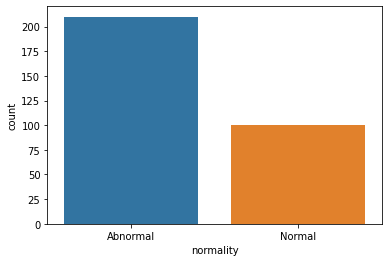

In [ ]:
# Distribution of Normality over Data 

print(data['normality'].value_counts())
sns.countplot(x="normality",data=data)

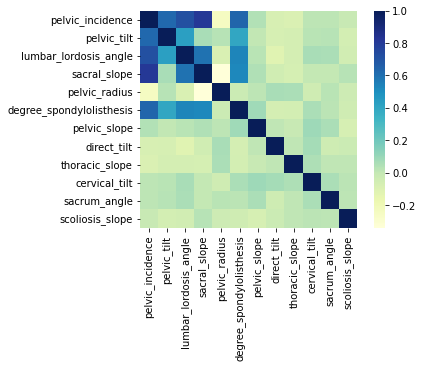

In [ ]:
# Visualization heatmap of correlations between each attribute

corr_mtx = data.corr()
fig, ax = plt.subplots()
sns.heatmap(corr_mtx, square=True, cmap="YlGnBu")

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


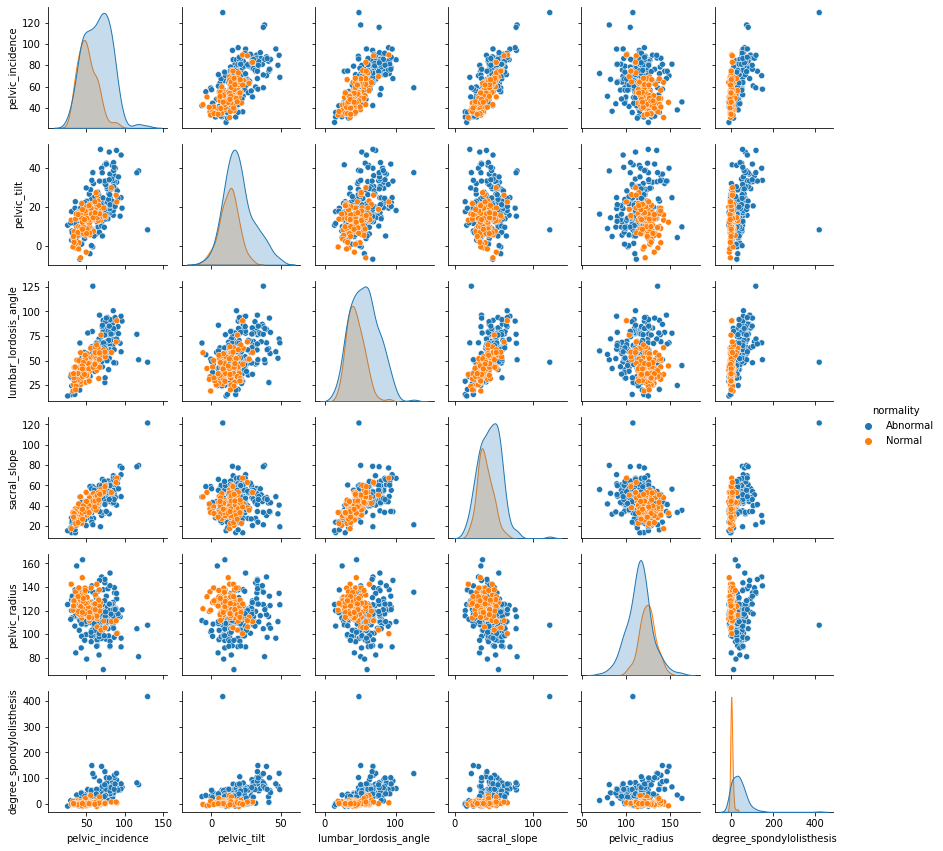

In [ ]:
# Pair plot showing pairwise relationships between features that are somewhat correlated from heatmap 

use_cols = ['pelvic_incidence','pelvic_tilt','lumbar_lordosis_angle','sacral_slope',
            'pelvic_radius','degree_spondylolisthesis','normality']
sns.pairplot(data[use_cols],size=2,hue='normality')
plt.show()

Pre Processing


*   Skewness
*   Reducing Outliers



In [ ]:
df=data.copy()
df.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,normality
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal


Skewness

In [ ]:
#check Skewness over one

from scipy.stats import skew
features_index = df.dtypes[df.dtypes != 'object'].index

skew_features = df[features_index].apply(lambda x : skew(x))
skew_features_top = skew_features[skew_features> 1]
print(skew_features_top.sort_values(ascending=False))

degree_spondylolisthesis    4.297032
dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: 4.317954


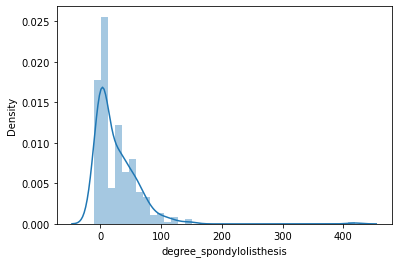

In [ ]:
sns.distplot(df['degree_spondylolisthesis'])
print("Skewness: %f" % df['degree_spondylolisthesis'].skew())

Reducing Outliers

In [ ]:
# Detect Outliers

minimum = 0
maximum = 0

def detect_outlier(feature):
    first_q = np.percentile(feature, 25)
    third_q = np.percentile(feature, 75) 
    #IQR = Inter Quartile Range

    IQR = third_q - first_q
    IQR *= 1.5
    minimum = first_q - IQR 
    maximum = third_q + IQR
    flag = False
    
    if(minimum > np.min(feature)):
        flag = True
    if(maximum < np.max(feature)):
        flag = True
    
    return flag

In [ ]:
X = df.iloc[:, :-1]
for i in range(len(X.columns)):
    if(detect_outlier(X[X.columns[i]])):
        print(X.columns[i], "Contains Outlier")

pelvic_incidence Contains Outlier
pelvic_tilt Contains Outlier
lumbar_lordosis_angle Contains Outlier
sacral_slope Contains Outlier
pelvic_radius Contains Outlier
degree_spondylolisthesis Contains Outlier


In [ ]:
# Reduce Outliers

def remove_outlier(feature):
    first_q = np.percentile(X[feature], 25)
    third_q = np.percentile(X[feature], 75)
    IQR = third_q - first_q
    IQR *= 1.5
    
    minimum = first_q - IQR # the acceptable minimum value
    maximum = third_q + IQR # the acceptable maximum value
    
    median = X[feature].median()
    
    X.loc[X[feature] < minimum, feature] = median 
    X.loc[X[feature] > maximum, feature] = median

for i in range(len(X.columns)): 
        remove_outlier(X.columns[i])

In [ ]:
for i in range (3):
    for i in range(len(X.columns)):
        remove_outlier(X.columns[i])

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 12 Text major ticklabel objects>)

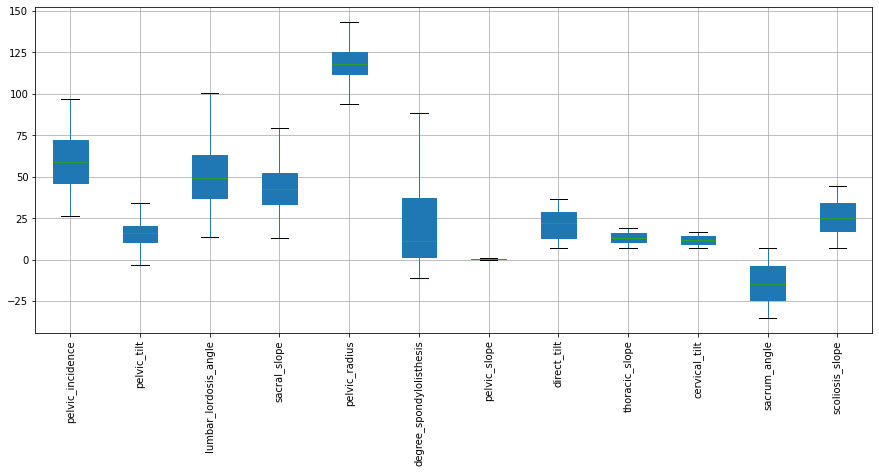

In [ ]:
plt.subplots(figsize=(15,6))
X.boxplot(patch_artist=True, sym="k.")
plt.xticks(rotation=90)

Scaling

In [ ]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(X)
scaled_df = pd.DataFrame(data = scaled_data, columns = X.columns)
scaled_df.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope
0,0.523049,0.684601,0.295226,0.408699,0.099877,0.108734,0.744554,0.186396,0.610506,0.845115,0.156861,0.977797
1,0.183082,0.349535,0.126987,0.235632,0.415357,0.157231,0.413783,0.197208,0.854170,0.996300,0.230878,0.243812
2,0.605368,0.675639,0.416076,0.501244,0.246507,0.075764,0.473750,0.666533,0.850409,0.983442,0.148026,0.327166
3,0.611962,0.740938,0.349432,0.471552,0.163957,0.224132,0.367741,0.556360,0.461461,0.448790,0.113989,0.316741
4,0.334210,0.338566,0.165053,0.402451,0.290294,0.190990,0.542524,0.957940,0.725757,0.188118,0.447450,0.479711


In [ ]:
from scipy.stats import skew
features_index = X.dtypes[X.dtypes != 'object'].index

skew_features = X[features_index].apply(lambda x : skew(x))
skew_features_top = skew_features[skew_features> 0]
print(skew_features_top.sort_values(ascending=False))

degree_spondylolisthesis    0.863313
lumbar_lordosis_angle       0.465611
sacral_slope                0.228751
pelvic_incidence            0.207670
pelvic_tilt                 0.200448
scoliosis_slope             0.063905
thoracic_slope              0.022934
pelvic_slope                0.016152
cervical_tilt               0.014944
direct_tilt                 0.010743
dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: 0.867516


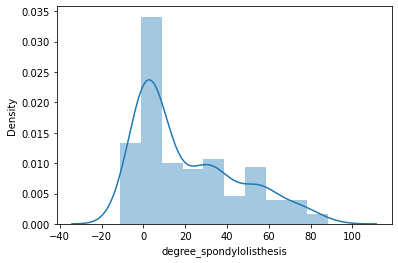

In [ ]:
sns.distplot(X['degree_spondylolisthesis'])
print("Skewness: %f" % X['degree_spondylolisthesis'].skew())

In [ ]:
label = df["normality"]
encoder = LabelEncoder()

label = encoder.fit_transform(label)
label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
X = scaled_df
y = label 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [ ]:
selected_features = scaled_df[['pelvic_tilt', 'pelvic_radius', 'degree_spondylolisthesis',
        'cervical_tilt', 'scoliosis_slope','sacral_slope', 'pelvic_incidence']]

X = selected_features.iloc[:,:-1]
y = label

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=5,stratify=y)

In [ ]:
lr_final = LogisticRegression(C=10)
from sklearn.svm import SVC
lr_svc = SVC(kernel = 'linear', gamma = 'auto',probability=True)
lr_svc.fit(X_train, y_train)

op_knn = KNeighborsClassifier(n_neighbors  = 41)
op_knn.fit(X_train,y_train)

lr = LogisticRegression()
lr.fit(X_train,y_train)

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=8, n_estimators=6, min_samples_leaf=4, min_samples_split=8)
rf.fit(X_train,y_train)

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=5, max_features=5, min_samples_leaf=7)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, max_features=5, min_samples_leaf=7)

In [ ]:
lr_pred = lr.predict(X_test)
knn_pred = op_knn.predict(X_test)
svc_pred = lr_svc.predict(X_test)
rf_pred = rf.predict(X_test)
dt_pred = dt.predict(X_test)

stacked_pred = np.array([knn_pred, lr_pred, svc_pred, rf_pred, dt_pred])
print(stacked_pred.shape)

(5, 62)


In [ ]:
stacked_pred = np.transpose(stacked_pred)
print(stacked_pred.shape)

(62, 5)


In [ ]:
lr_final.fit(stacked_pred, y_test)
final = lr_final.predict(stacked_pred)

lr_final_acc = accuracy_score(y_test , final)*100

print(f'Final model accuray : {lr_final_acc:.2f}%') 

Final model accuray : 90.32%


In [ ]:
#Calculating Mean Squared Error

mse = mean_squared_error(y_test,final)
rmse = np.sqrt(mse)
print('{0} MSE : {1}'.format(final.__class__.__name__,np.round(mse, 2)))
print('{0} RMSE : {1}'.format(final.__class__.__name__,np.round(rmse, 2)))

ndarray MSE : 0.1
ndarray RMSE : 0.31


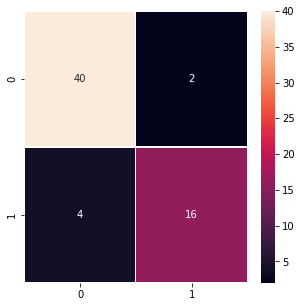

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test,final),annot=True,linewidths=.3)
plt.show()

# print(classification_report(y_test,final))